This notebook contains Phase 3 and Phase 4 of Project Capstone. In Phase 3, Data Visualization is done and in  the Phase 4, various models are built to predict Star rating and Price. 

# Phase 3

In [4]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
db=sqlite3.connect("C:/Users/Azhar1/Documents/DataTrained/Phase3.db")

# Declare cursor
cursor = db.cursor()

In [3]:
# Create Table1
cursor.execute("CREATE TABLE Table1(ShoeName TEXT, Category TEXT, NoOfColors INT, Price INT)")

In [5]:
# Inserting data from the file

with open('Date1.csv','r') as file:
    total_records=0
    for row in file:
        cursor.execute("insert into Table1 values(?,?,?,?)",row.split(","))
        db.commit()
        total_records+=1
print(total_records,'Records inserted')

60 Records inserted


In [6]:
# Create Table2
cursor.execute("CREATE TABLE Table2(CountOfSizes INT, Color1 TEXT, Color2 TEXT, Color3 TEXT, Color4 TEXT, Color5 TEXT,StyleCode TEXT)")

In [8]:
# Inserting data from the file

with open('Date2.csv','r') as file:
    total_records=0
    for row in file:
        cursor.execute("insert into Table2 values(?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        total_records+=1
print(total_records,'Records inserted')

60 Records inserted


In [9]:
# Create Table3
cursor.execute("CREATE TABLE Table3(Reviews TEXT, Size INT, Comfort INT, Durablity INT, StarRating REAL)")

In [10]:
# Inserting data from the file

with open('Data3.csv','r') as file:
    total_records=0
    for row in file:
        cursor.execute("insert into Table3 values(?,?,?,?,?)",row.split(","))
        db.commit()
        total_records+=1
print(total_records,'Records inserted')

60 Records inserted


In [5]:
# Loading Dataset:
df=pd.read_csv('C:/Users/Azhar1/Documents/DataTrained/Capstone_data.csv', encoding='latin-1')

# Exploratory Data Analysis

In [9]:
df.head()

,ShoeName,Category(Men/Women),No.of Colors,Price,Count of Sizes,Colors 1,Colors 2,Colors 3,Colors 4,Colors 5,Style Code/Product Code,Reviews,Size,Comfort,Durability/quality/performance(quantification),Star rating
0,Nike Air Force 1 '07,Men,2,7495,13,White,Black,NaN,NaN,NaN,CW2288-111,Looks cool and comfortable But you can't wear ...,5.0,NaN,NaN,4.8
1,Nike Air Force 1 '07 EasyOn,Women,1,9695,9,White,NaN,NaN,NaN,NaN,DX5883-100,Youre so comfortable and easy to put on,4.0,NaN,NaN,4.6
2,Nike Gamma Force,Women,4,8495,11,White,Light Smoke Grey,Summit White,Malachite,NaN,DX9176-106,So cute Shipped sooner than said online Comfy ...,4.0,NaN,NaN,4.4
3,Nike Court Vision Low,Men,1,5695,12,Light Orewood Brown,NaN,NaN,NaN,NaN,FQ8075-133,NaN,3.0,NaN,NaN,NaN
4,Nike Dunk Low Retro Premium,Men,1,9695,13,Deep Jungle,NaN,NaN,NaN,NaN,FB8896-300,My Sister bought me this pair of shoes I like ...,5.0,NaN,NaN,5.0


In [10]:
df.shape

(60, 16)

The dimension of our data is 60 rows * 16 columns

In [11]:
df.dtypes

ShoeName                                           object
Category(Men/Women)                                object
No.of Colors                                        int64
Price                                               int64
Count of Sizes                                      int64
Colors 1                                           object
Colors 2                                           object
Colors 3                                           object
Colors 4                                           object
Colors 5                                           object
Style Code/Product Code                            object
Reviews                                            object
Size                                              float64
Comfort                                           float64
Durability/quality/performance(quantification)    float64
Star rating                                       float64
dtype: object

1. We can see that there are 3 integer, 4 float and 9 object data types in the data.
2. Size rating, Comfort rating, Durablity/quality/performance(quantification) rating and Star rating are float data types.
3. All object datatypes are to be converted into numerical data in further steps.

In [12]:
df.columns

Index(['ShoeName', 'Category(Men/Women)', 'No.of Colors', 'Price',
       'Count of Sizes', 'Colors 1', 'Colors 2', 'Colors 3', 'Colors 4',
       'Colors 5', 'Style Code/Product Code', 'Reviews', 'Size', 'Comfort',
       'Durability/quality/performance(quantification)', 'Star rating'],
      dtype='object')

In [13]:
df.describe()

,No.of Colors,Price,Count of Sizes,Size,Comfort,Durability/quality/performance(quantification),Star rating
count,60.000000,60.000000,60.000000,38.000000,28.000000,28.000000,30.000000
mean,2.233333,6494.583333,6.566667,4.210526,4.071429,4.285714,4.620000
std,1.555381,3774.581819,3.988826,0.664054,0.813250,0.762896,0.279655
min,1.000000,1496.000000,1.000000,3.000000,3.000000,3.000000,4.000000
25%,1.000000,2398.500000,5.000000,4.000000,3.000000,4.000000,4.400000
50%,2.000000,6524.000000,6.000000,4.000000,4.000000,4.000000,4.600000
75%,3.000000,9695.000000,6.250000,5.000000,5.000000,5.000000,4.800000
max,8.000000,13999.000000,21.000000,5.000000,5.000000,5.000000,5.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ShoeName                                        60 non-null     object 
 1   Category(Men/Women)                             60 non-null     object 
 2   No.of Colors                                    60 non-null     int64  
 3   Price                                           60 non-null     int64  
 4   Count of Sizes                                  60 non-null     int64  
 5   Colors 1                                        60 non-null     object 
 6   Colors 2                                        33 non-null     object 
 7   Colors 3                                        19 non-null     object 
 8   Colors 4                                        11 non-null     object 
 9   Colors 5                                     

We can see that few columns are having null values in our dataset.

In [15]:
#printing the unique values available in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*75)

Superstar Shoes                        3
Max Cushioning Arch Fit - Swi          2
Trigger Unisex Shoes                   2
Samba OG Shoes                         2
Green Vent Aero-w                      1
Arch Fit Glide-Step                    1
Max Cushioning Hyper Craze Bo          1
Go Walk Massage Fit - Tidal            1
Max Cushioning Arch Fit - Enig         1
OutDry Mid                             1
Trailstorm Peak Mid-m                  1
Trailstorm Peak Mid-w                  1
Grey Trailstrom Peak Mid               1
Trailstrom Beyond-w                    1
Trailstrom Beyond-m                    1
Nike Air Force 1 '07                   1
Black Vent Aero-w                      1
Stamina V3                             1
Blue Vent Aero-m                       1
Black Slip-on Shoe                     1
Navy Slip-on Shoe                      1
Camel Sneakers                         1
Navy Sports Shoes                      1
Black Sneaker                          1
Balck Slip Shoe 

In [6]:
#checking the number of null values present in each columns 

df.isnull().sum()

ShoeName                                           0
Category(Men/Women)                                0
No.of Colors                                       0
Price                                              0
Count of Sizes                                     0
Colors 1                                           0
Colors 2                                          27
Colors 3                                          41
Colors 4                                          49
Colors 5                                          56
Style Code/Product Code                            0
Reviews                                           30
Size                                              22
Comfort                                           32
Durability/quality/performance(quantification)    32
Star rating                                       30
dtype: int64

Data is having null values in Colors 3, Colors 3, Colors 4, Colors 5, Style Code/Product Code, Reviews, Size, Comfort, Durablility/quality/performance(quatification) and Star rating Columns.

In [7]:
# Filling null values

df['Size'].fillna(value=df['Size'].median(), inplace= True)
df['Comfort'].fillna(value=df['Comfort'].median(), inplace= True)
df['Durability/quality/performance(quantification)'].fillna(value=df['Durability/quality/performance(quantification)'].median(), inplace= True)
df['Star rating'].fillna(value=df['Star rating'].median(), inplace= True)

In [8]:
#checking null values 

df.isnull().sum()

ShoeName                                           0
Category(Men/Women)                                0
No.of Colors                                       0
Price                                              0
Count of Sizes                                     0
Colors 1                                           0
Colors 2                                          27
Colors 3                                          41
Colors 4                                          49
Colors 5                                          56
Style Code/Product Code                            0
Reviews                                           30
Size                                               0
Comfort                                            0
Durability/quality/performance(quantification)     0
Star rating                                        0
dtype: int64

We can see that there are still null values in few columns as Colors 2, Colors 3, Colors 4, Colors 5 and Reviews Columns.

# Data Visualization

<Axes: >

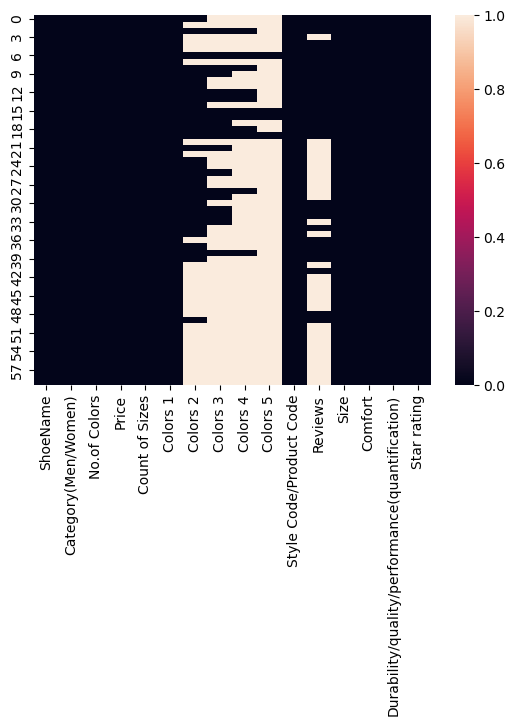

In [52]:
# visualising null values in dataset

sns.heatmap(df.isnull())

Null values visualized graphically

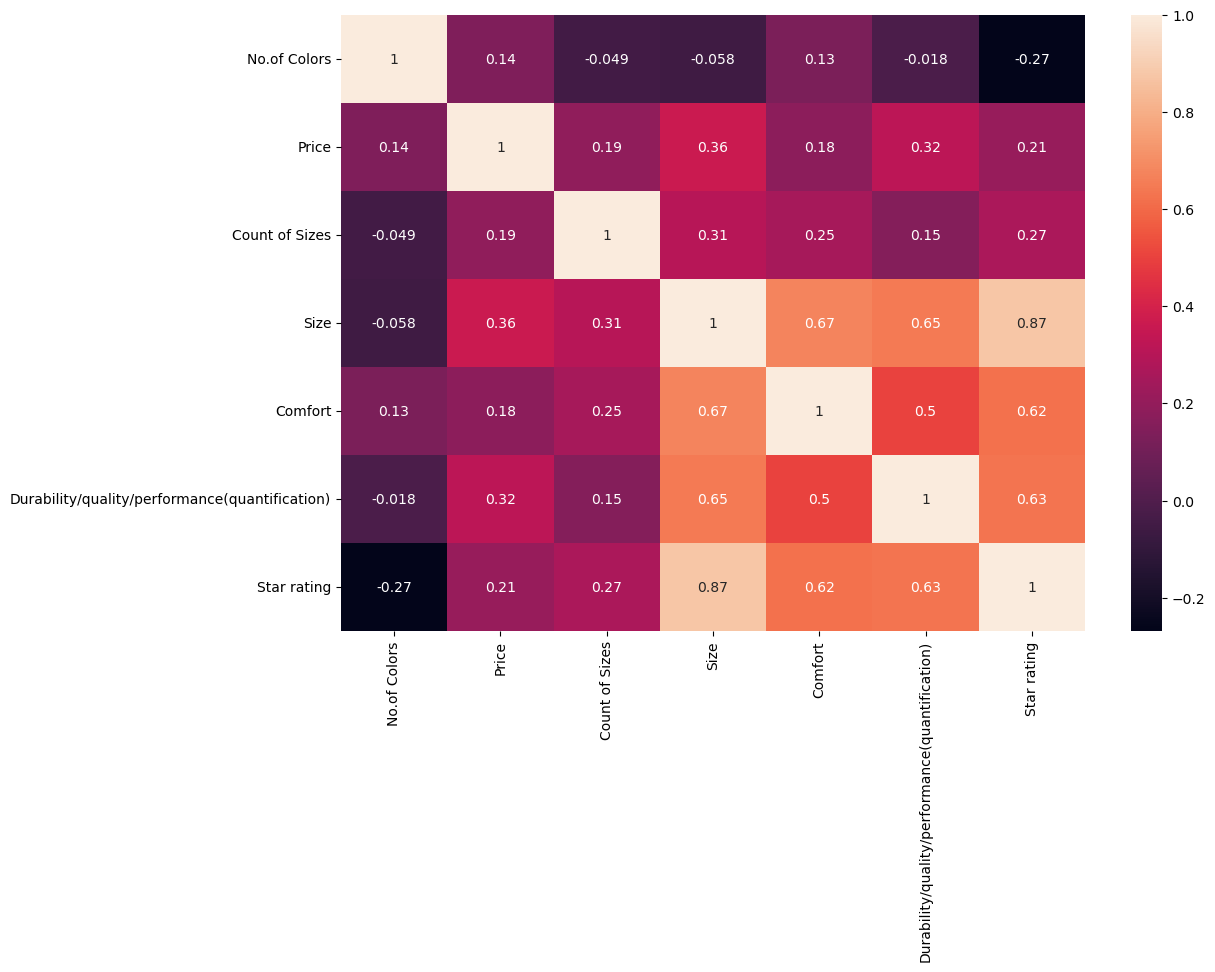

In [19]:
#Showing the attributes are related to each other can be seen by plotting the heatmap over the attributes correlation value
corr = df.corr()
plt.figure(figsize=(12,8), facecolor='white')
sns.heatmap(corr, annot=True)
plt.show()

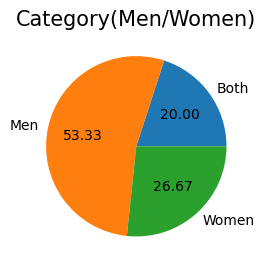

In [22]:
plt.subplot(1,2,2)
df.groupby('Category(Men/Women)').size().plot(kind='pie', autopct='%.2f')
plt.title('Category(Men/Women)', fontsize=15)
plt.show()

We can see that 53.33 percent of shoes are Men's, 26.67 % are Women's shoes and 20 % are for both.

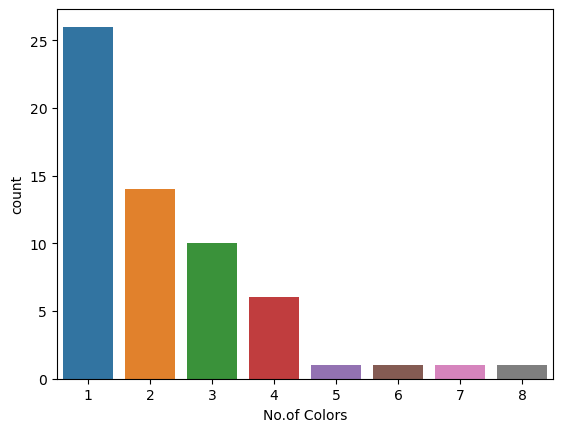

In [23]:
sns.countplot(x='No.of Colors',data=df)
plt.show()

Most of the brands are offering 2 colors and there are only few brands that are offering more colors than 5.

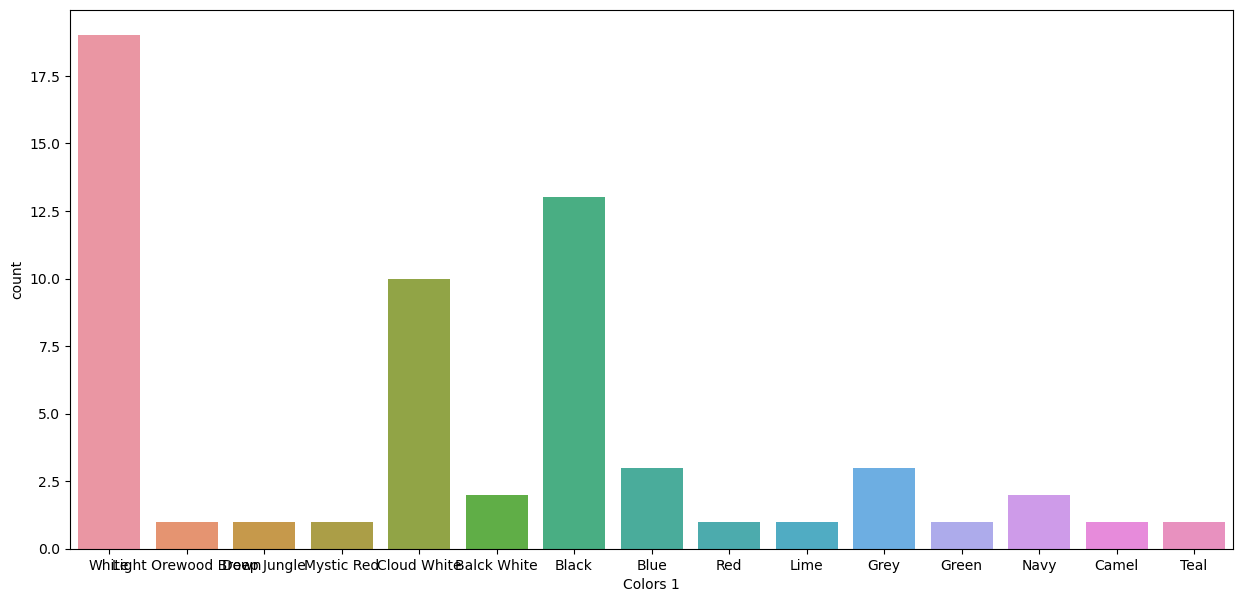

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x='Colors 1',data=df)
plt.show()

We can see that White and Black shoes are sold more.

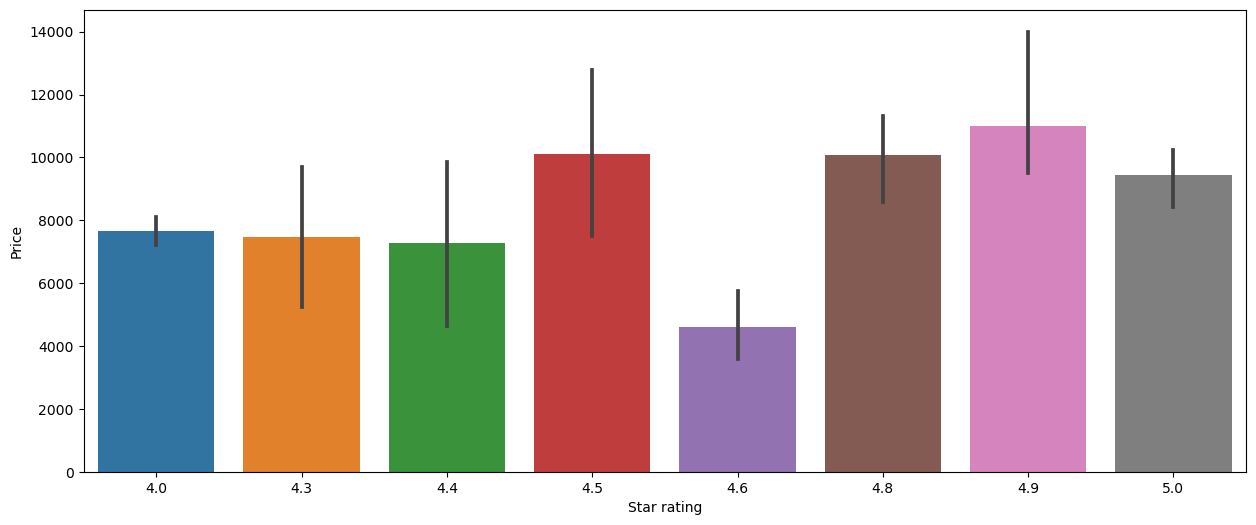

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(x="Star rating",y="Price",data=df)
plt.show()

We can see that price is higher for 4.9 rated shoes.

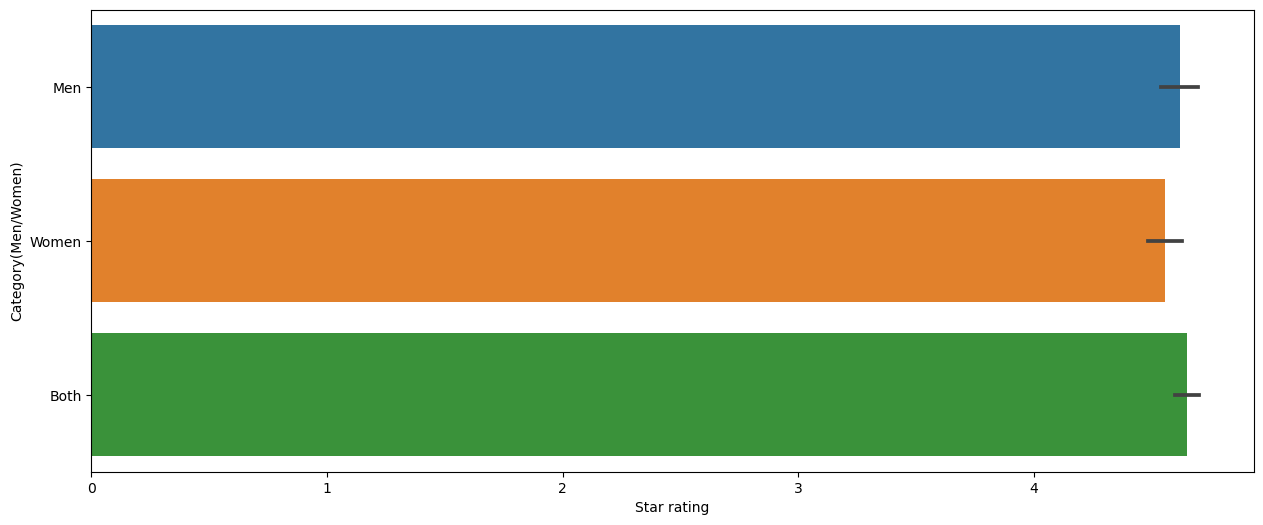

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x="Star rating",y="Category(Men/Women)",data=df)
plt.show()

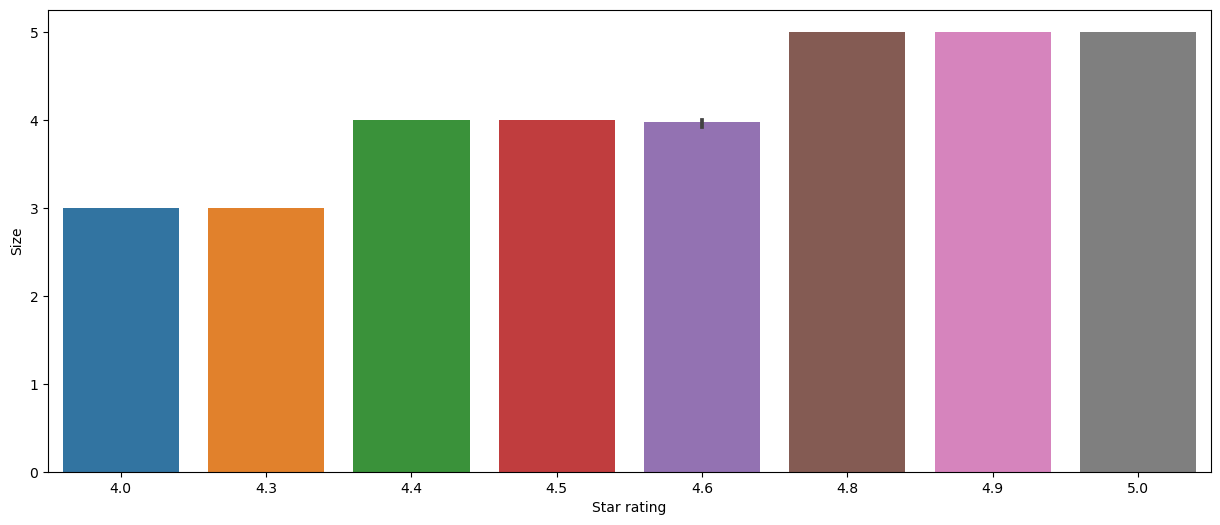

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(x="Star rating",y="Size",data=df)
plt.show()

For rating 4.8 and above the sizes are higher than others.

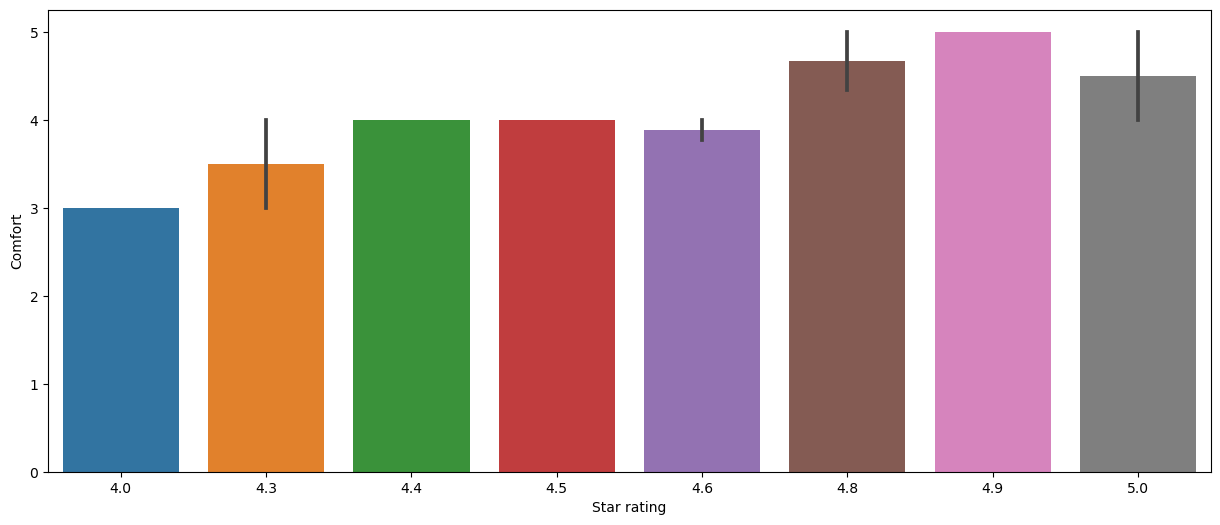

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(x="Star rating",y="Comfort",data=df)
plt.show()

As we seen in price vs rating, here also the comfort rating is highest for 4.9 rated shoes.

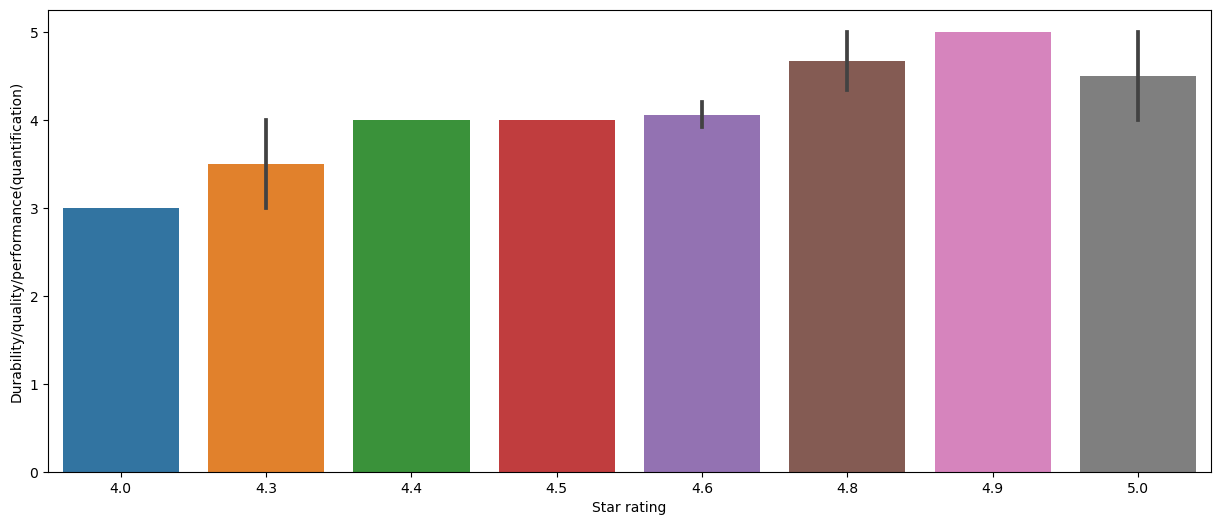

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x="Star rating",y="Durability/quality/performance(quantification)",data=df)
plt.show()

Durability/quality/performance(quantification) rating is highest for 4.9 rated shoes.

<function matplotlib.pyplot.show(close=None, block=None)>

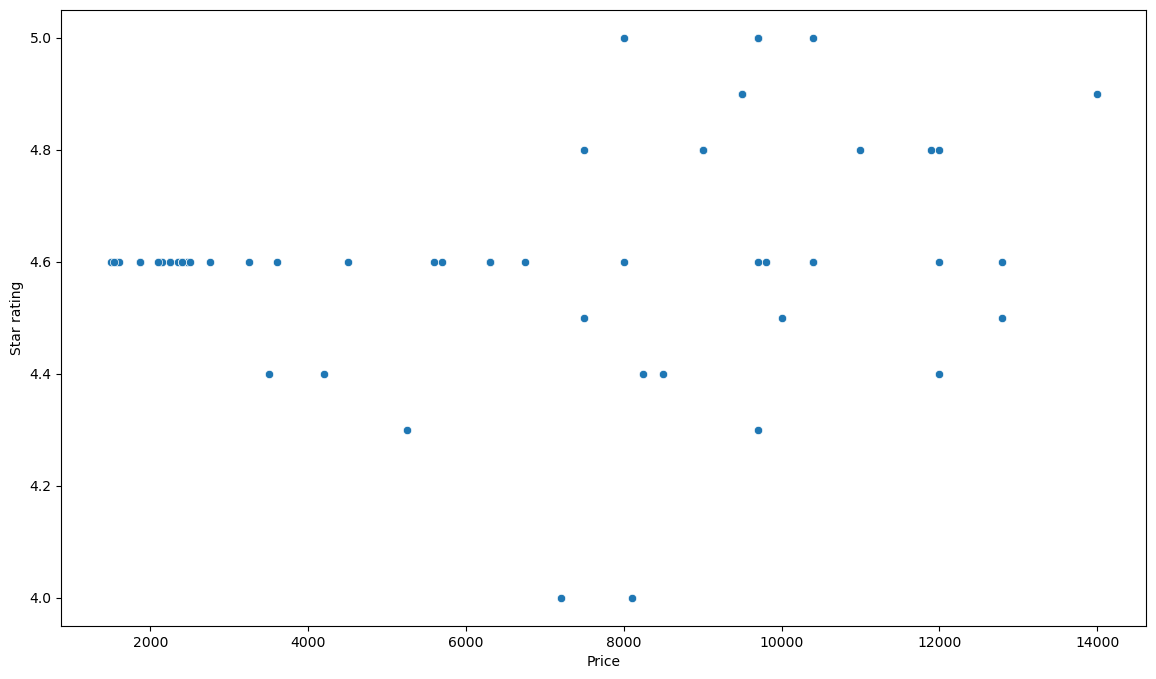

In [39]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="Price",y="Star rating",data = df)
plt.show

It is seen that the notion, the higher the price the better they are is false. 

<function matplotlib.pyplot.show(close=None, block=None)>

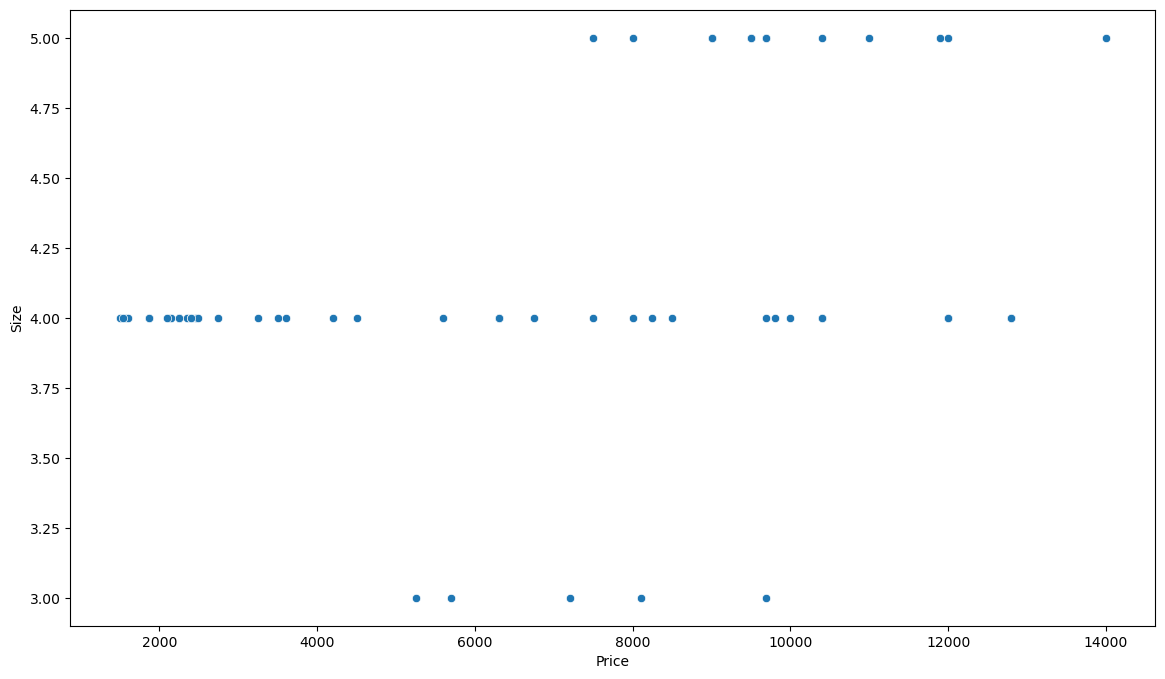

In [40]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="Price",y="Size",data = df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

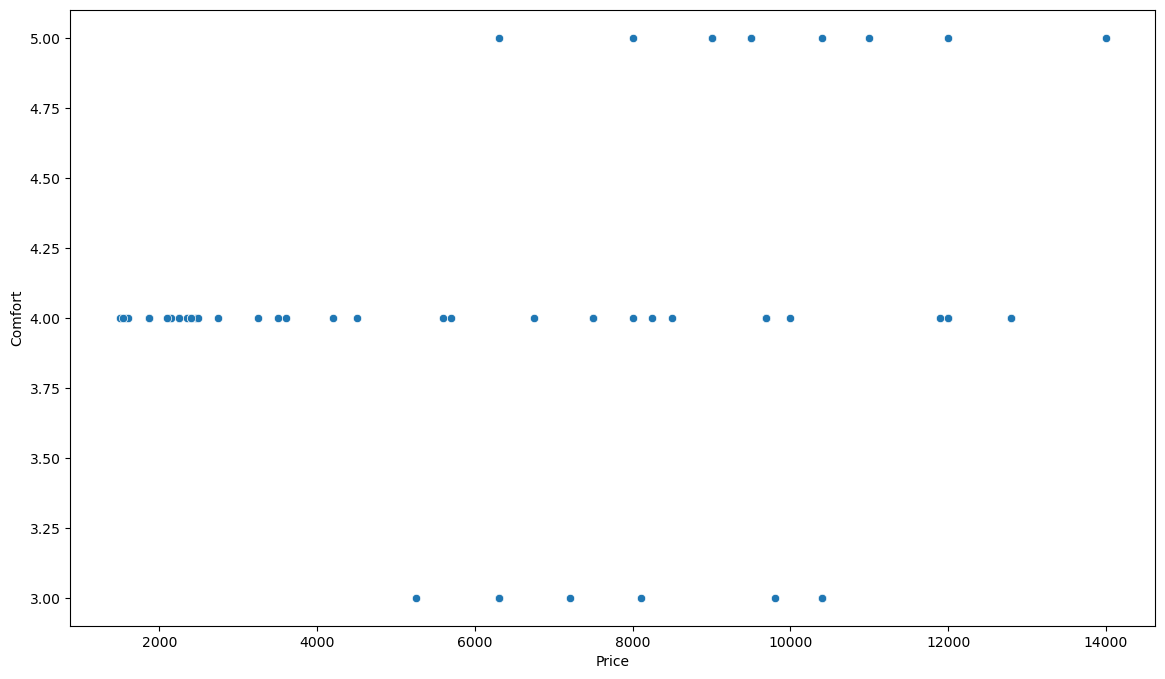

In [41]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="Price",y="Comfort",data = df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

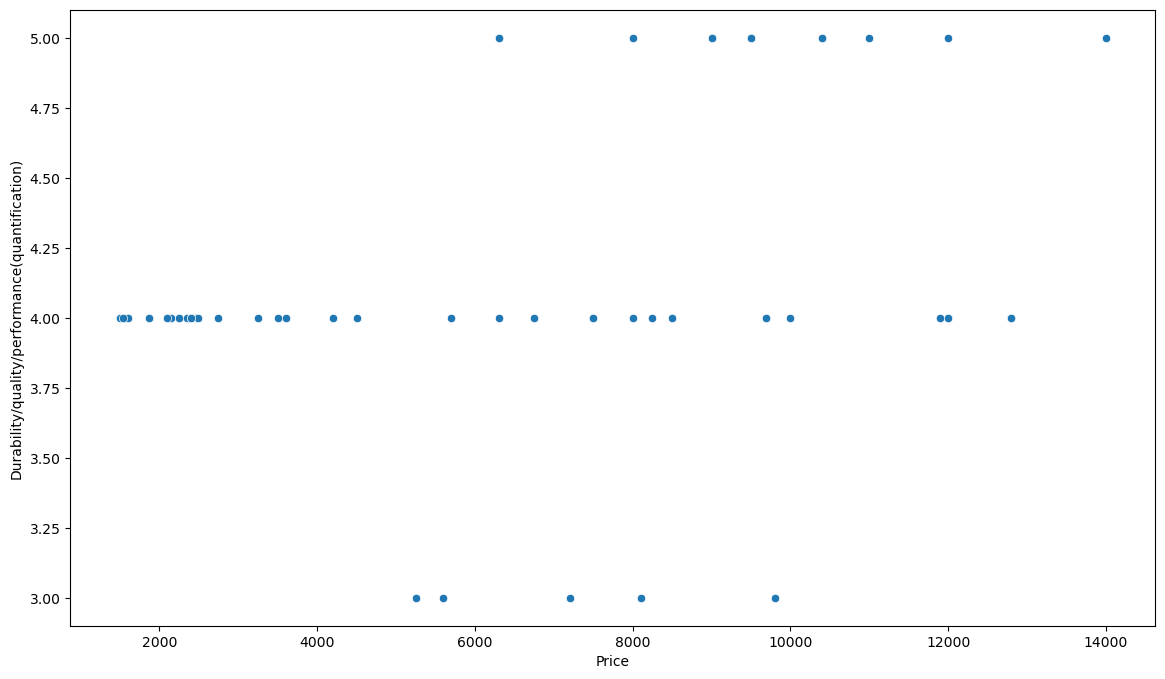

In [42]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="Price",y="Durability/quality/performance(quantification)",data = df)
plt.show

In [47]:
num_features= df.select_dtypes(include=[np.number])

Text(0.5, 1.0, 'Price')

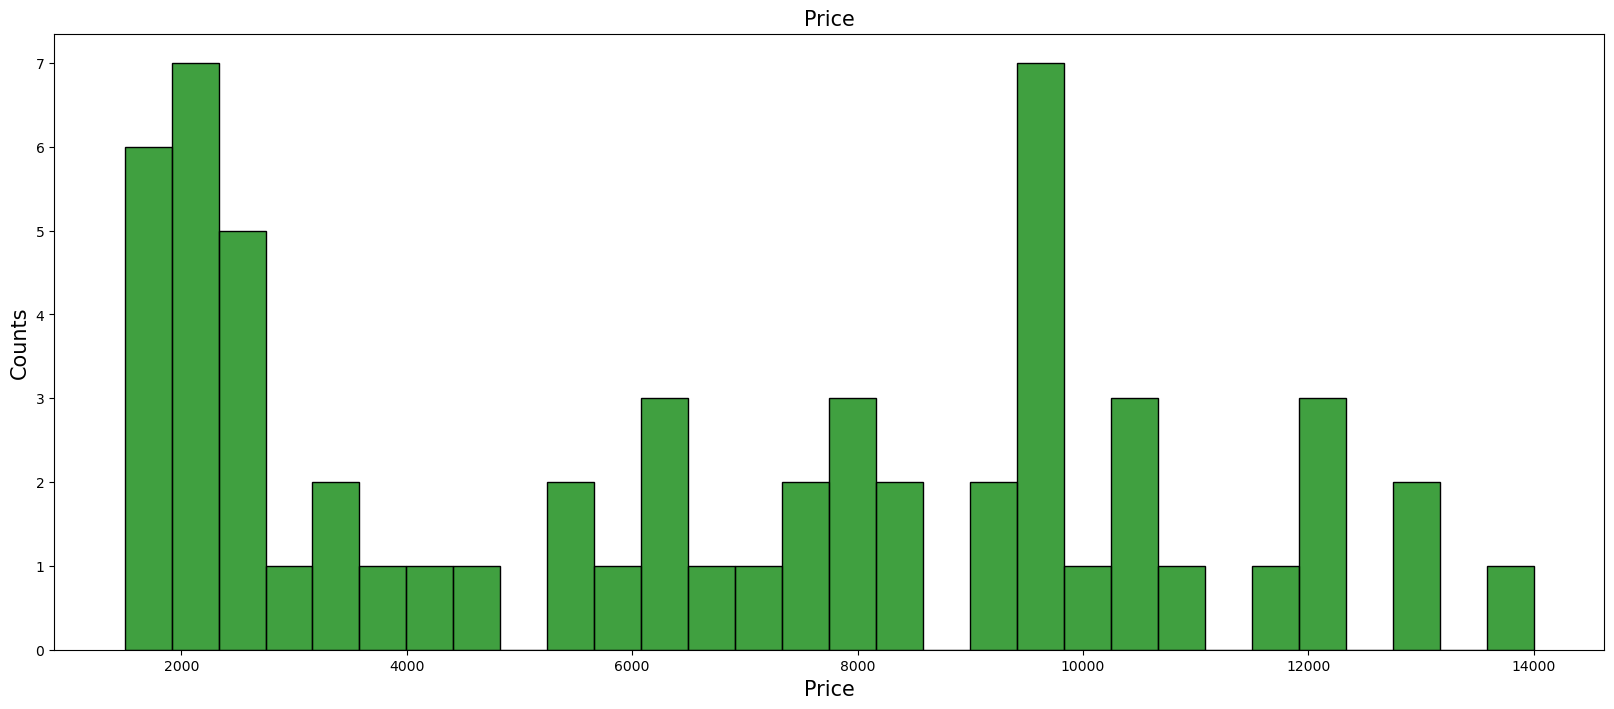

In [48]:
plt.figure(figsize=(20,8))
sns.histplot(num_features['Price'], bins= 30, color='g')
plt.xlabel('Price', fontsize=15 )
plt.ylabel('Counts', fontsize=15 )
plt.title('Price', fontsize=15)

<function matplotlib.pyplot.show(close=None, block=None)>

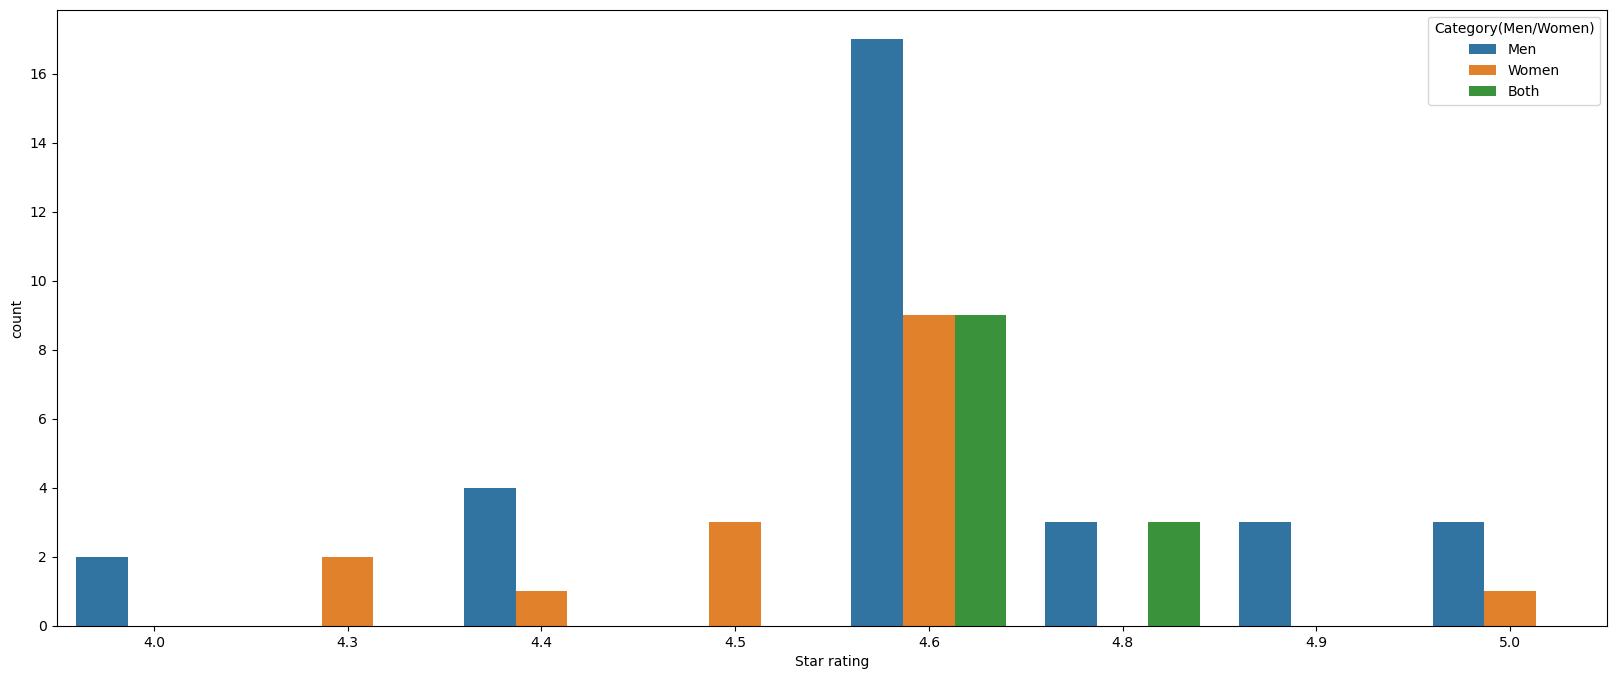

In [50]:
plt.figure(figsize=(20,8))
sns.countplot(df,x='Star rating',hue='Category(Men/Women)')
plt.show

4.6 is the star rating given often.

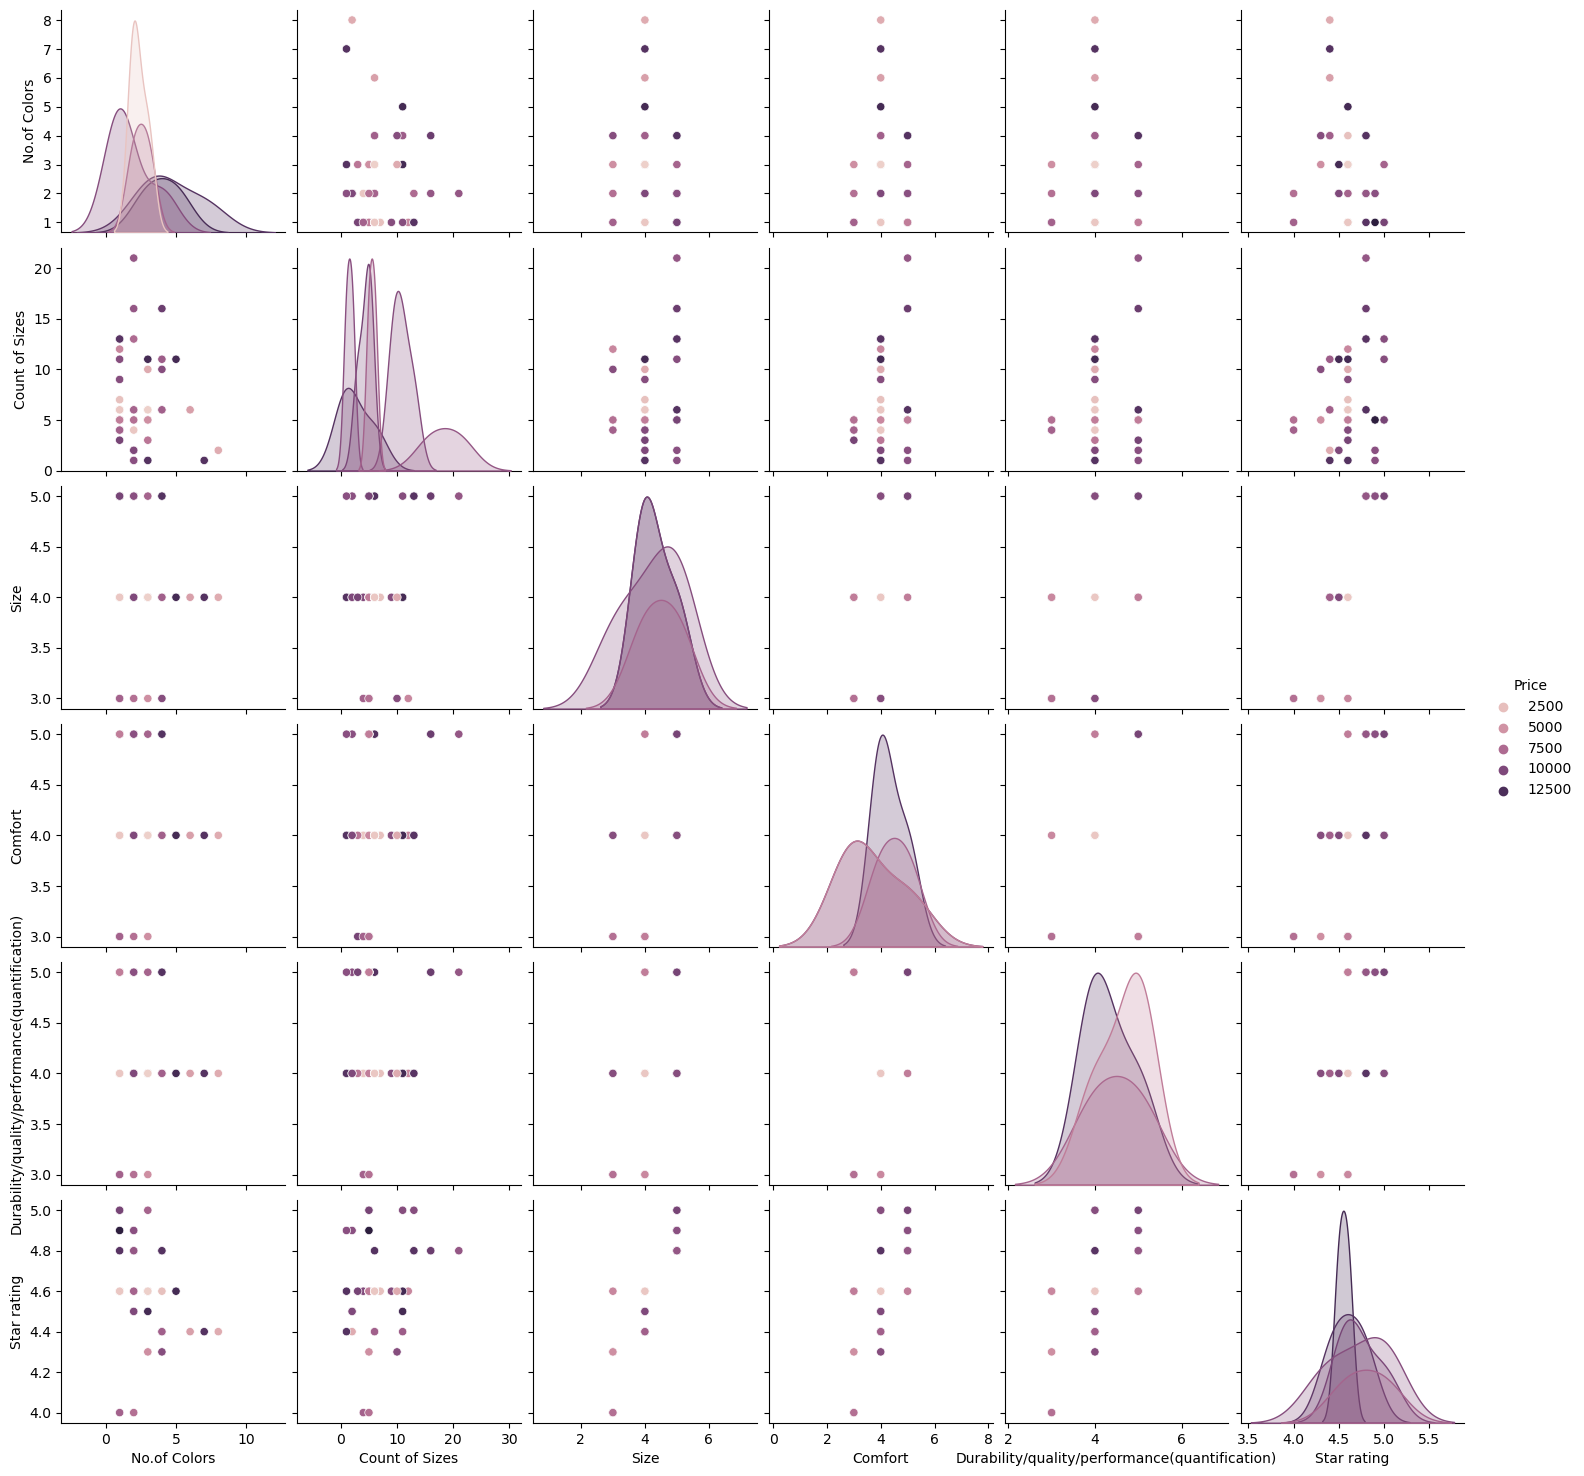

In [56]:
sns.pairplot(data=df, hue='Price')

In [9]:
df.drop(columns=['Colors 2','Colors 3','Colors 4','Colors 5','Reviews'],axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
for col in df[df.columns[df.dtypes == 'object']]:
    df[col] = le.fit_transform(df[col])

In [12]:
df.head()

,ShoeName,Category(Men/Women),No.of Colors,Price,Count of Sizes,Colors 1,Style Code/Product Code,Size,Comfort,Durability/quality/performance(quantification),Star rating
0,28,1,2,7495,13,14,33,5.0,4.0,4.0,4.8
1,29,2,1,9695,9,14,37,4.0,4.0,4.0,4.6
2,35,2,4,8495,11,14,38,4.0,4.0,4.0,4.4
3,32,1,1,5695,12,8,46,3.0,4.0,4.0,4.6
4,33,1,1,9695,13,5,43,5.0,4.0,4.0,5.0


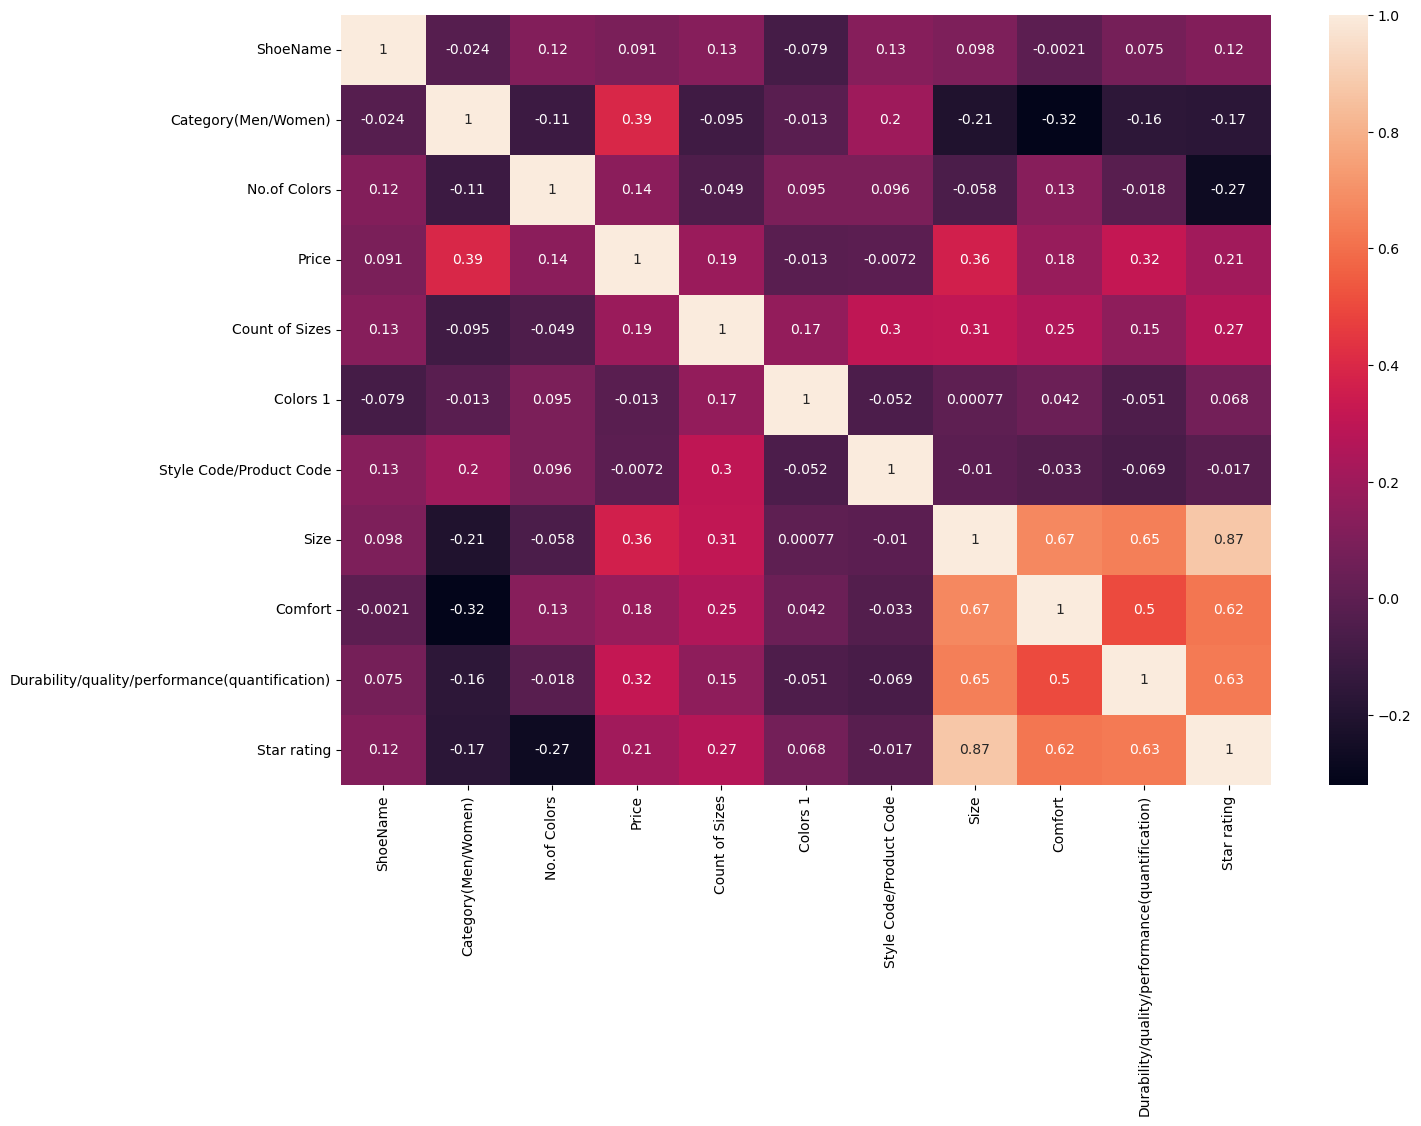

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

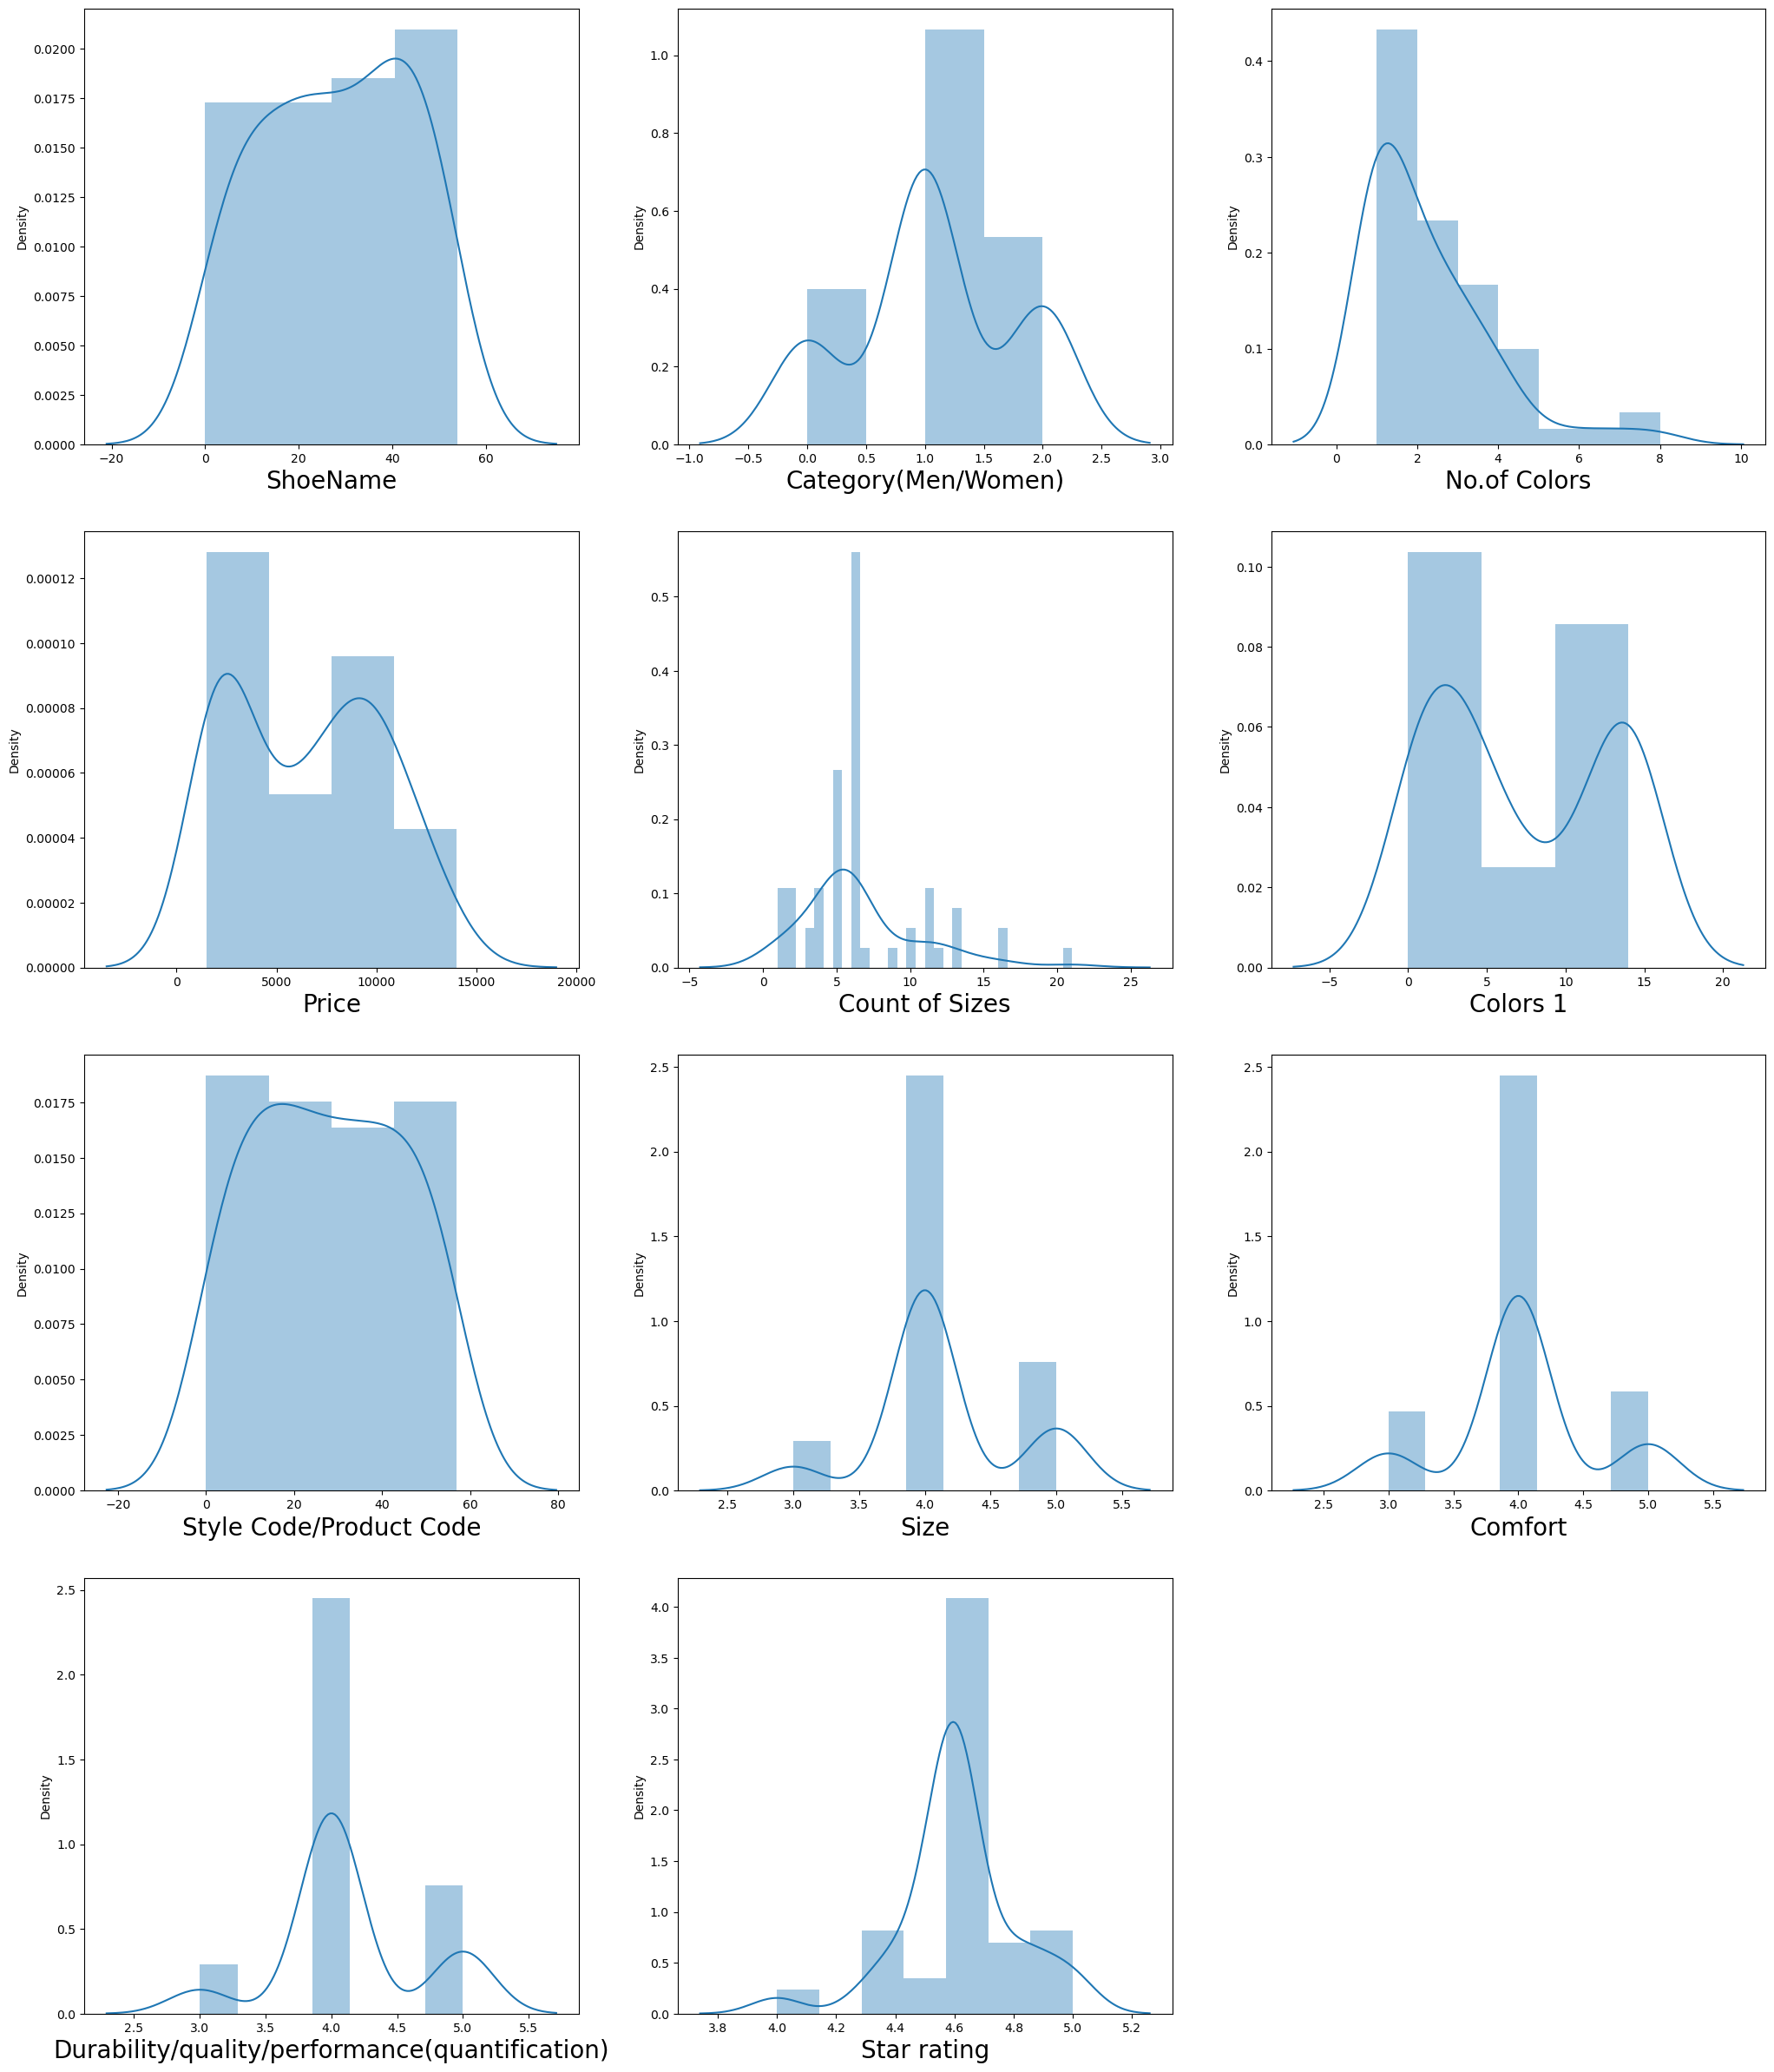

In [63]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in df:
    if plotnumber <=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

All features are looking normally distributed.

In [13]:
df.skew()

ShoeName                                         -0.113899
Category(Men/Women)                              -0.085115
No.of Colors                                      1.692995
Price                                             0.142046
Count of Sizes                                    1.330864
Colors 1                                          0.163973
Style Code/Product Code                           0.037178
Size                                              0.123664
Comfort                                           0.021391
Durability/quality/performance(quantification)    0.123664
Star rating                                      -0.491895
dtype: float64

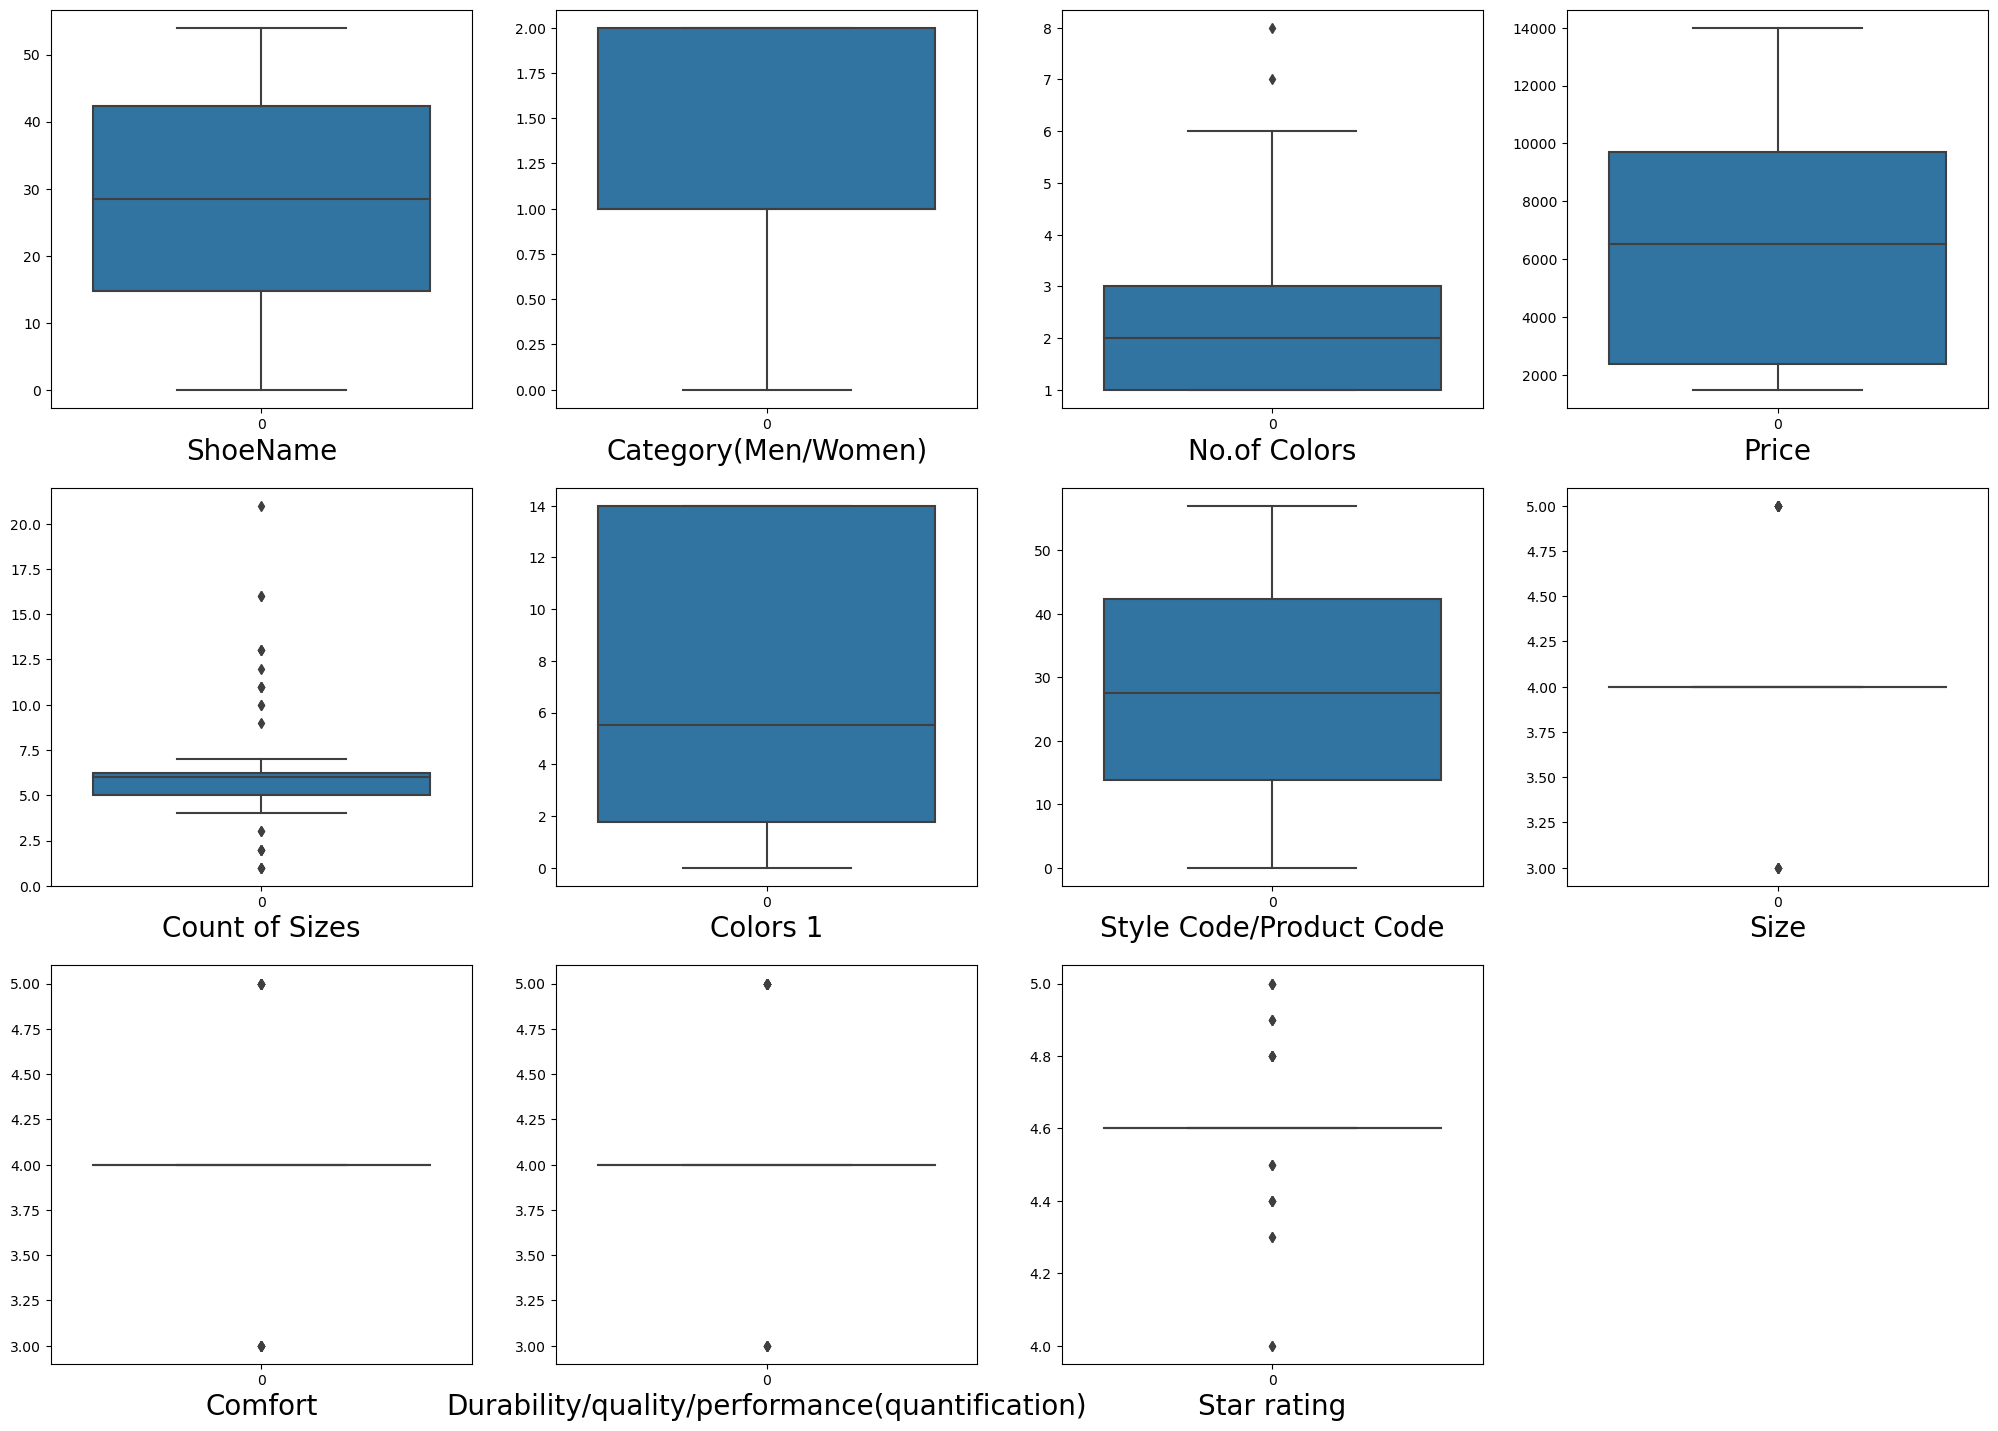

In [65]:
# Checking for outliers

plt.figure(figsize=(25,30))
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.subplot(5,4,plotnumber)
        ax = sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

# PHASE 4

# Model building with Star Rating as Target

In [14]:
# Dividing into Feature and Target data

x = df.drop(columns=['Star rating'],axis=1)
y = df['Star rating']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [17]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,ShoeName,1.076771
1,Category(Men/Women),1.794950
2,No.of Colors,1.267663
3,Price,1.906775
4,Count of Sizes,1.413907
5,Colors 1,1.087905
6,Style Code/Product Code,1.308627
7,Size,2.834703
8,Comfort,2.118811
9,Durability/quality/performance(quantification),1.809957


If VIF > 10, It means multicollinearity is present.

In [18]:
x

,ShoeName,Category(Men/Women),No.of Colors,Price,Count of Sizes,Colors 1,Style Code/Product Code,Size,Comfort,Durability/quality/performance(quantification)
0,28,1,2,7495,13,14,33,5.0,4.0,4.0
1,29,2,1,9695,9,14,37,4.0,4.0,4.0
2,35,2,4,8495,11,14,38,4.0,4.0,4.0
3,32,1,1,5695,12,8,46,3.0,4.0,4.0
4,33,1,1,9695,13,5,43,5.0,4.0,4.0
5,31,1,1,11895,13,10,44,5.0,4.0,4.0
6,30,2,5,12795,11,14,39,4.0,4.0,4.0
7,34,2,1,9695,11,14,45,5.0,4.0,4.0
8,36,2,4,9695,10,14,36,3.0,4.0,4.0
9,21,2,3,12795,11,14,42,4.0,4.0,4.0


# Finding Best Random State

In [19]:
#Finding the best random state

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
maxAccu=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state= i)
    le=LinearRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.8931461069200578 at random state  50


# Training & Testing of Data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [21]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression

lg=LinearRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predlg))

for i in range(2,15):
    cvs = cross_val_score(lg,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predlg))
print('\n Mean squared error:',mean_squared_error(y_test,predlg))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predlg)))

r2 accuracy score is:  0.8931461069200578
Cross Validation Score for cv= 2 is 0.10045362503346567
Cross Validation Score for cv= 3 is 0.24129731088760012
Cross Validation Score for cv= 4 is 0.40112159978028
Cross Validation Score for cv= 5 is 0.5549687954596841
Cross Validation Score for cv= 6 is 0.2728113089209013
Cross Validation Score for cv= 7 is 0.41599253926109026
Cross Validation Score for cv= 8 is -7.117241230183705e+26
Cross Validation Score for cv= 9 is -5.824859661347747e+26
Cross Validation Score for cv= 10 is -7.146831962044394e+26
Cross Validation Score for cv= 11 is -3.122702460910135e+26
Cross Validation Score for cv= 12 is -0.03902038748910669
Cross Validation Score for cv= 13 is -0.03944671545527585
Cross Validation Score for cv= 14 is -0.009428825026598586

 Mean absolute error: 0.04870057309871258

 Mean squared error: 0.004303837360164337

 Root Mean squared error: 0.06560363831499239


In [22]:
# Using Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predRF))

for i in range(2,15):
    cvs = cross_val_score(RF,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predRF))
print('\n Mean squared error:',mean_squared_error(y_test,predRF))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predRF)))

r2 accuracy score is:  0.8260648275862083
Cross Validation Score for cv= 2 is 0.37980033125745327
Cross Validation Score for cv= 3 is 0.564513503154145
Cross Validation Score for cv= 4 is 0.2082735322893599
Cross Validation Score for cv= 5 is 0.4222732649539549
Cross Validation Score for cv= 6 is 0.33727817633695906
Cross Validation Score for cv= 7 is 0.41125519709469543
Cross Validation Score for cv= 8 is -8.601914787234954e+23
Cross Validation Score for cv= 9 is -8.260722268564667e+26
Cross Validation Score for cv= 10 is -1.483087819736868e+27
Cross Validation Score for cv= 11 is -4.864321075966609e+26
Cross Validation Score for cv= 12 is -0.08536986183857308
Cross Validation Score for cv= 13 is -0.0006891626664118355
Cross Validation Score for cv= 14 is 0.06863664405209667

 Mean absolute error: 0.06238888888888589

 Mean squared error: 0.007005722222222163

 Root Mean squared error: 0.08370019248617151


In [25]:
# Using XGB Regression

from xgboost import XGBRegressor
xb=XGBRegressor()
xb.fit(x_train,y_train)
predxb=xb.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predxb))

for i in range(2,8):
    cvs = cross_val_score(xb,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predxb))
print('\n Mean squared error:',mean_squared_error(y_test,predxb))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predxb)))

r2 accuracy score is:  0.8526525073795772
Cross Validation Score for cv= 2 is 0.44931557863018173
Cross Validation Score for cv= 3 is 0.45292632659493304
Cross Validation Score for cv= 4 is -0.1164142425241215
Cross Validation Score for cv= 5 is 0.21424375114423921
Cross Validation Score for cv= 6 is 0.267125591107828
Cross Validation Score for cv= 7 is 0.31959622612881383

 Mean absolute error: 0.03557320170932327

 Mean squared error: 0.005934829563878135

 Root Mean squared error: 0.0770378450106059


In [26]:
# Using Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,preddt))

for i in range(2,10):
    cvs = cross_val_score(dt,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,preddt))
print('\n Mean squared error:',mean_squared_error(y_test,preddt))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddt)))

r2 accuracy score is:  0.4344827586206901
Cross Validation Score for cv= 2 is 0.3260133433846171
Cross Validation Score for cv= 3 is 0.39464293971560105
Cross Validation Score for cv= 4 is -0.4288748333039014
Cross Validation Score for cv= 5 is 0.3296282946149268
Cross Validation Score for cv= 6 is 0.30330544053370184
Cross Validation Score for cv= 7 is 0.27265272054352097
Cross Validation Score for cv= 8 is -0.2566174961949309
Cross Validation Score for cv= 9 is -0.3227505429421413

 Mean absolute error: 0.061111111111111484

 Mean squared error: 0.022777777777777748

 Root Mean squared error: 0.1509230856356235


In [27]:
# Using KNeighbors Regression

from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
predKNR=KNR.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predKNR))

for i in range(2,8):
    cvs = cross_val_score(KNR,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predKNR))
print('\n Mean squared error:',mean_squared_error(y_test,predKNR))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predKNR)))

r2 accuracy score is:  -0.47531034482758794
Cross Validation Score for cv= 2 is -0.09336935721632367
Cross Validation Score for cv= 3 is -0.2234688976515268
Cross Validation Score for cv= 4 is -0.3949981654511169
Cross Validation Score for cv= 5 is -0.29397119365774993
Cross Validation Score for cv= 6 is 0.08376770998254413
Cross Validation Score for cv= 7 is -0.08772223248552417

 Mean absolute error: 0.1444444444444445

 Mean squared error: 0.059422222222222265

 Root Mean squared error: 0.24376673731709636


In [28]:
# Using GradientBoost Regression

from sklearn.ensemble import GradientBoostingRegressor
BG=KNeighborsRegressor()
BG.fit(x_train,y_train)
predBG=BG.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predBG))

for i in range(2,8):
    cvs = cross_val_score(BG,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predBG))
print('\n Mean squared error:',mean_squared_error(y_test,predBG))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predBG)))

r2 accuracy score is:  -0.47531034482758794
Cross Validation Score for cv= 2 is -0.09336935721632367
Cross Validation Score for cv= 3 is -0.2234688976515268
Cross Validation Score for cv= 4 is -0.3949981654511169
Cross Validation Score for cv= 5 is -0.29397119365774993
Cross Validation Score for cv= 6 is 0.08376770998254413
Cross Validation Score for cv= 7 is -0.08772223248552417

 Mean absolute error: 0.1444444444444445

 Mean squared error: 0.059422222222222265

 Root Mean squared error: 0.24376673731709636


# After several model performances, Linear Regression has the best accuracy score of 89.31 % with CV score of 100%

# Hyperparameter tuning the model

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500,800,950]}

In [30]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [31]:
r=Ridge()
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('Mean Squred Error ',mean_squared_error(y_test,y_pred))
print('Root mean squred ',mean_squared_error(y_test,y_pred,squared=False))
print('mean absolute error ',mean_absolute_error(y_test,y_pred))
print('r2 score ',r2_score(y_test,y_pred))

Mean Squred Error  0.004950606547547576
Root mean squred  0.07036054681103307
mean absolute error  0.05148260671969313
r2 score  0.877088389164336


In [32]:
Grid_search =  GridSearchCV(r, param_grid=ridge_params)

In [33]:
Grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [200, 230, 250, 265, 270, 275, 290, 300, 500,
                                   800, 950]})

In [34]:
print(Grid_search.best_params_)

{'alpha': 200}


In [35]:
grid_predictions =Grid_search.predict(x_test)

In [36]:
grid_predictions

print('Mean Squred Error is ',mean_squared_error(y_test,grid_predictions))
print('Root mean squred is',mean_squared_error(y_test,grid_predictions,squared=False))
print('mean absolute error is ',mean_absolute_error(y_test,grid_predictions))
print('r2 score is',r2_score(y_test,grid_predictions))

Mean Squred Error is  0.03305517168186964
Root mean squred is 0.18181081288490417
mean absolute error is  0.10245743663548017
r2 score is 0.1793198754846156


# Hyper Parameter tuning is giving less accuracy, so saving untuned model.

# Saving the model

In [43]:
import joblib
joblib.dump(lg,'Project_StarRatings.pkl')

['Project_StarRatings.pkl']

# Predicting the saved model

In [44]:
model=joblib.load('Project_StarRatings.pkl')

#Prediction
prediction=model.predict(x_test)
prediction

array([4.62486053, 4.53408756, 4.63540799, 4.56017277, 4.55635274,
       4.28078641, 4.63206818, 4.58273979, 4.82574698, 4.58754324,
       4.55172826, 4.93619472, 4.64431218, 4.48705358, 4.58924598,
       4.191509  , 4.91183195, 4.59732859])

# 2. Model building with Price as Target

In [65]:
# Dividing into Feature and Target data

x = df.drop(columns=['Price'],axis=1)
y = df['Price']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [68]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,ShoeName,1.119236
1,Category(Men/Women),1.183443
2,No.of Colors,1.602410
3,Count of Sizes,1.353570
4,Colors 1,1.158787
5,Style Code/Product Code,1.243680
6,Size,5.666714
7,Comfort,2.242885
8,Durability/quality/performance(quantification),1.854070
9,Star rating,6.424543


If VIF > 10, It means multicollinearity is present.

# Finding Best Random State

In [49]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
maxAccu=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state= i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.7335417690181343 at random state  90


# Training & Testing of Data

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=90)

# Applying various models

In [82]:
# Using Decision Tree model:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,preddtc))
print('Mean absolute error:',mean_absolute_error(y_test,preddtc))
print('Mean squared error:',mean_squared_error(y_test,preddtc))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtc)))

r2 accuracy score is:  0.5997586367466916
Mean absolute error: 1688.4444444444443
Mean squared error: 6381432.888888889
Root Mean squared error: 2526.1498152106674


In [83]:
# Using Logistic Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
lg=LinearRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predlg))
print('Mean absolute error:',mean_absolute_error(y_test,predlg))
print('Mean squared error:',mean_squared_error(y_test,predlg))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predlg)))

r2 accuracy score is:  0.21411414123321637
Mean absolute error: 2683.734584063445
Mean squared error: 12530133.880423183
Root Mean squared error: 3539.792914906631


In [84]:
# Using MNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predmnb))
print('Mean absolute error:',mean_absolute_error(y_test,predmnb))
print('Mean squared error:',mean_squared_error(y_test,predmnb))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predmnb)))

r2 accuracy score is:  -0.1610624389783104
Mean absolute error: 2768.5
Mean squared error: 18511934.833333332
Root Mean squared error: 4302.54980602588


In [85]:
# Using SVC model:

from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predsvc))
print('Mean absolute error:',mean_absolute_error(y_test,predsvc))
print('Mean squared error:',mean_squared_error(y_test,predsvc))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvc)))

r2 accuracy score is:  -0.7032154280922309
Mean absolute error: 4389.444444444444
Mean squared error: 27156001.222222224
Root Mean squared error: 5211.142026679202


In [86]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predsvc))
print('Mean absolute error:',mean_absolute_error(y_test,predsvc))
print('Mean squared error:',mean_squared_error(y_test,predsvc))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvc)))

r2 accuracy score is:  -0.1729015676062886
Mean absolute error: 3392.3333333333335
Mean squared error: 18700697.444444444
Root Mean squared error: 4324.430302877414


In [87]:
# Using Random Forest classifier:

from sklearn.ensemble import RandomForestClassifier
RF=DecisionTreeClassifier()
RF.fit(x_train,y_train)
RF.score(x_train,y_train)
predRF=RF.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predRF))
print('Mean absolute error:',mean_absolute_error(y_test,predRF))
print('Mean squared error:',mean_squared_error(y_test,predRF))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predRF)))

r2 accuracy score is:  0.31095577078423653
Mean absolute error: 2284.1111111111113
Mean squared error: 10986094.666666666
Root Mean squared error: 3314.5278195644496


In [89]:
# Using AdaBoost classifier:

from sklearn.ensemble import AdaBoostClassifier
Ad=AdaBoostClassifier()
Ad.fit(x_train,y_train)
predAd=Ad.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predAd))
print('Mean absolute error:',mean_absolute_error(y_test,predAd))
print('Mean squared error:',mean_squared_error(y_test,predAd))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predAd)))

r2 accuracy score is:  -0.7174894910986549
Mean absolute error: 4180.111111111111
Mean squared error: 27383586.333333332
Root Mean squared error: 5232.932861535043


In [90]:
# Using GuasianNB classifier:

from sklearn.naive_bayes import GaussianNB
Gu=GaussianNB()
Gu.fit(x_train,y_train)
predGu=Gu.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predGu))
print('Mean absolute error:',mean_absolute_error(y_test,predGu))
print('Mean squared error:',mean_squared_error(y_test,predGu))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predGu)))

r2 accuracy score is:  -0.8345940694160336
Mean absolute error: 4576.333333333333
Mean squared error: 29250697.222222224
Root Mean squared error: 5408.391371029118


# Hyperparameter tuning the model

In [94]:
dt_default = DecisionTreeClassifier(random_state=90)
dt_default.fit(x_train, y_train)

DecisionTreeClassifier(random_state=90)

In [104]:
print("Train Accuracy :", accuracy_score(y_train, dt_default.predict(x_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_default.predict(x_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_default.predict(x_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_default.predict(x_test)))

Train Accuracy : 1.0
Train Confusion Matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0

In [101]:
# Controlling the depth of the  tree

dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [105]:
print("Train Accuracy :", accuracy_score(y_train, dt_depth.predict(x_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_depth.predict(x_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_depth.predict(x_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_depth.predict(x_test)))

Train Accuracy : 0.3333333333333333
Train Confusion Matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [103]:
# Specifying minimum samples before split

dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

In [106]:
print("Train Accuracy :", accuracy_score(y_train, dt_min_split.predict(x_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_min_split.predict(x_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_min_split.predict(x_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_min_split.predict(x_test)))

Train Accuracy : 0.21428571428571427
Train Confusion Matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0

# Hyper Parameter tuning is giving less accuracy, so saving untuned model.

# Saving the model

In [107]:
import joblib
joblib.dump(lg,'Project_Price.pkl')

['Project_Price.pkl']

# Predicting the Saved model

In [108]:
model=joblib.load('Project_Price.pkl')

#Prediction
prediction=model.predict(x_test)
prediction

array([3635.96017464, 9467.81526505, 9926.45359671, 1950.2791294 ,
       3331.91265945, 5213.47763398, 9345.41332514, 6662.26477324,
       1553.58507272, 5916.6909763 , 2549.83313051, 2840.75323279,
       4796.69696909, 2833.25655169, 4864.64563597, 7864.38058567,
       4763.36439587, 2463.89185124])